In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
trainMain = pd.read_csv('HW_train_main_data.csv')
trainAdd = pd.read_csv('HW_train_additional_data.csv')

In [4]:
testMain = pd.read_csv('HW_test_main_data.csv')
testAdd = pd.read_csv('HW_test_additional_data.csv')

In [5]:
trainMain.shape

(29000, 13)

In [6]:
trainAdd.shape

(29000, 19)

In [7]:
trainMain.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0


In [8]:
trainMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29000 non-null  int64  
 1   timestamp            29000 non-null  object 
 2   full_sq              29000 non-null  int64  
 3   life_sq              22935 non-null  float64
 4   floor                28843 non-null  float64
 5   max_floor            19887 non-null  float64
 6   material             19887 non-null  float64
 7   build_year           16059 non-null  float64
 8   num_room             19887 non-null  float64
 9   kitch_sq             19887 non-null  float64
 10  apartment condition  16088 non-null  float64
 11  sub_area             29000 non-null  int64  
 12  price                29000 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 2.9+ MB


In [9]:
trainMain.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
count,29000.000000,29000.000000,22935.000000,28843.000000,19887.000000,19887.000000,1.605900e+04,19887.000000,19887.000000,16088.000000,29000.000000,2.900000e+04
mean,54932.809724,55.235345,34.103248,7.665326,12.560567,1.821491,3.126422e+03,1.908282,6.424297,2.108031,76.503931,7.472051e+06
std,25981.968682,38.781299,20.911329,5.319891,6.775449,1.475440,1.582194e+05,0.853043,28.960510,0.882274,39.308253,5.056736e+06
min,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.085000e+05
25%,32382.500000,40.000000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,1.000000,44.000000,4.957875e+06
50%,54984.500000,50.000000,30.000000,6.000000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,78.000000,6.553400e+06
75%,77417.500000,64.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,105.000000,8.674925e+06
max,99999.000000,5329.000000,802.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,145.000000,1.124444e+08


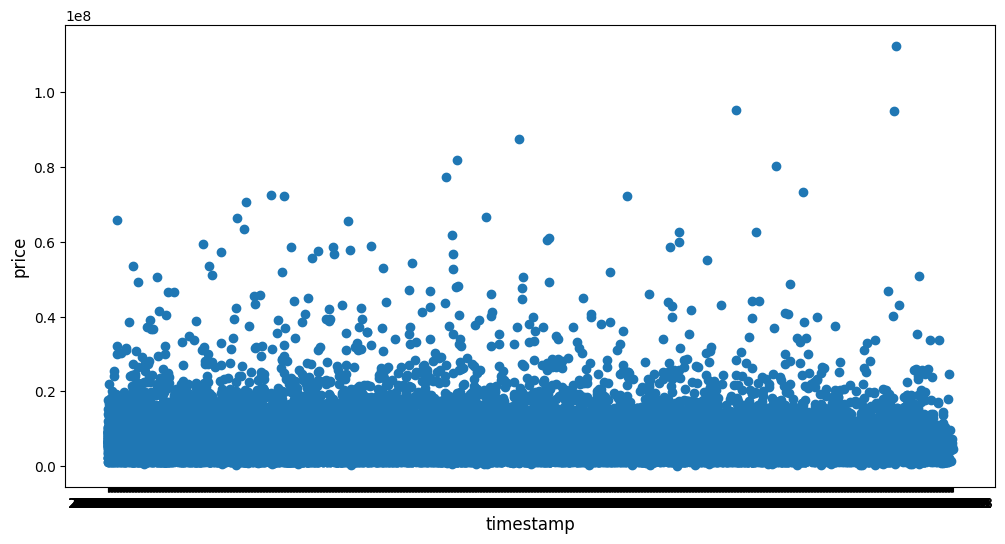

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(trainMain.timestamp, trainMain.price)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

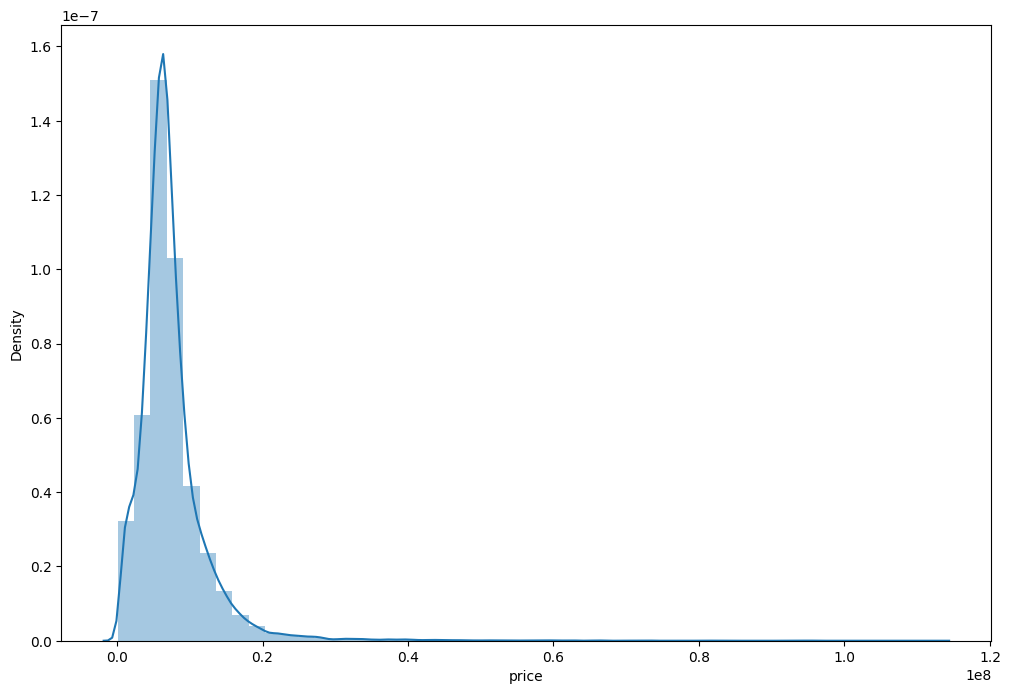

In [11]:
plt.figure(figsize=(12, 8))
sns.distplot(trainMain.price.values, bins=50, kde=True)
plt.xlabel('price')
plt.show()

In [12]:
Q1 = trainMain.price.quantile(0.25)
Q3 = trainMain.price.quantile(0.75)
IQR = Q3 - Q1

trainMain = trainMain[~((trainMain.price < (Q1 - 1.5 * IQR)) \
                        |(trainMain.price > (Q3 + 1.5 * IQR)))]

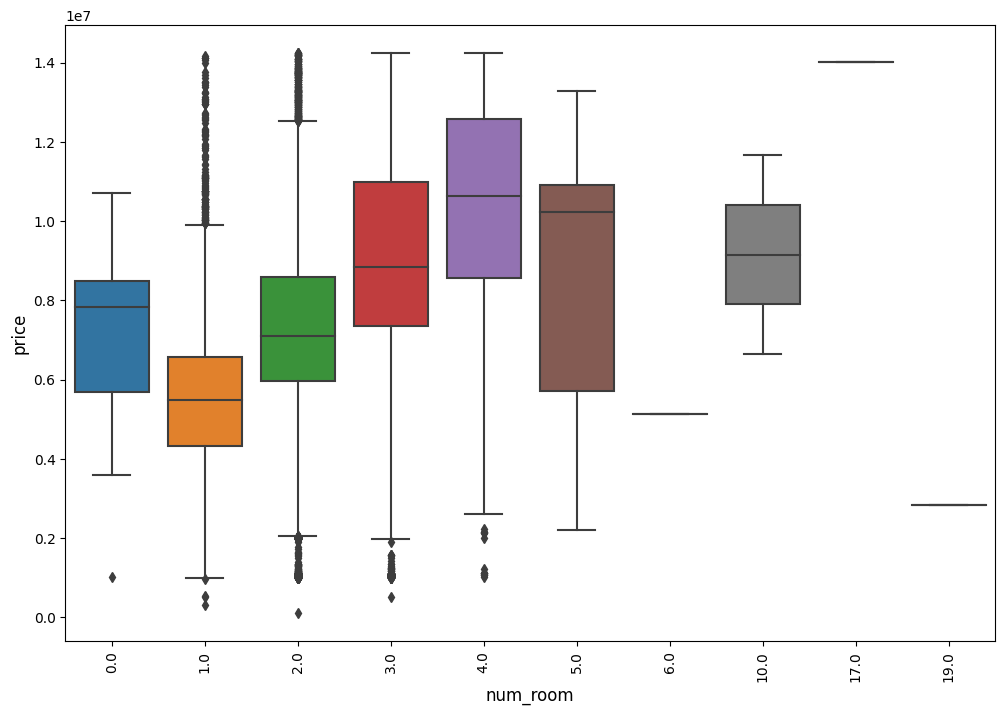

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='num_room', y='price', data=trainMain)
plt.ylabel('price', fontsize=12)
plt.xlabel('num_room', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

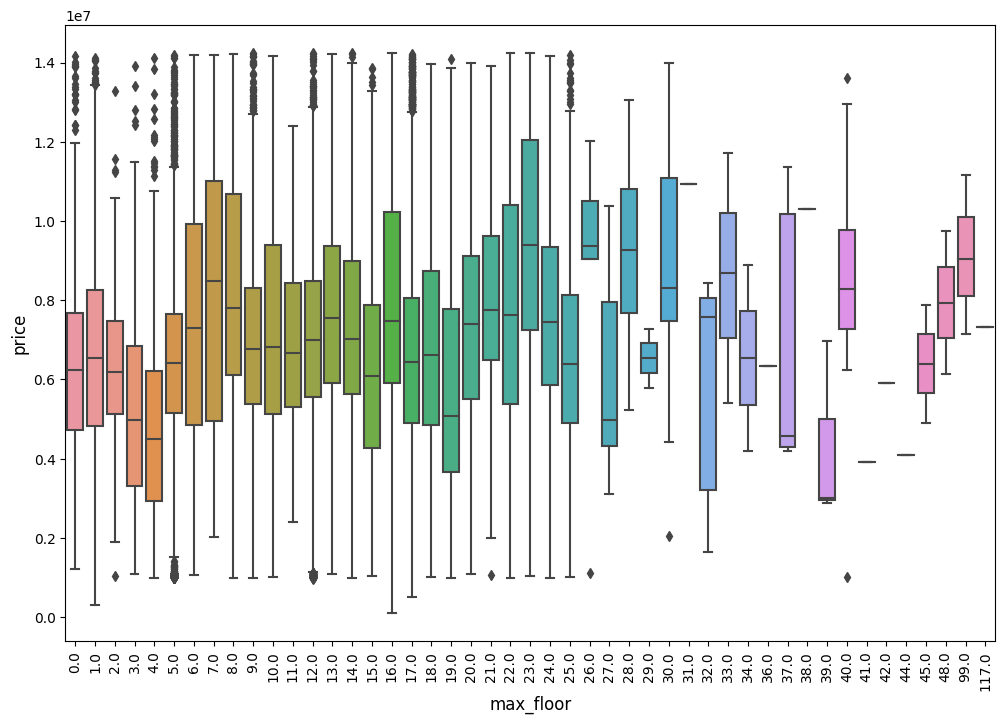

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='max_floor', y='price', data=trainMain)
plt.ylabel('price', fontsize=12)
plt.xlabel('max_floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

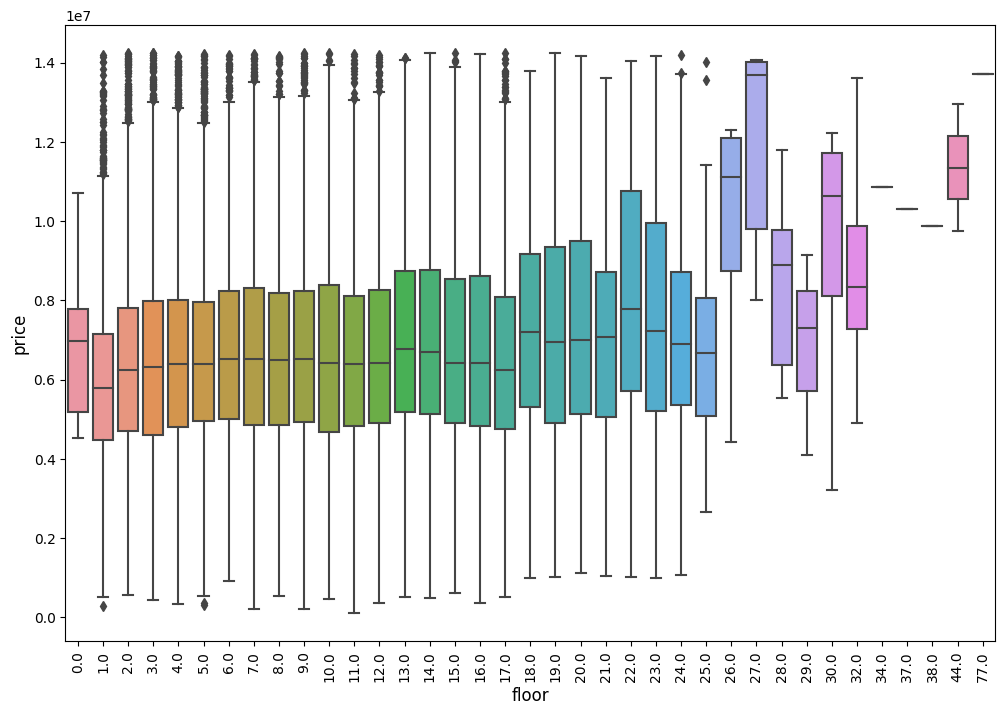

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='floor', y='price', data=trainMain)
plt.ylabel('price', fontsize=12)
plt.xlabel('floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

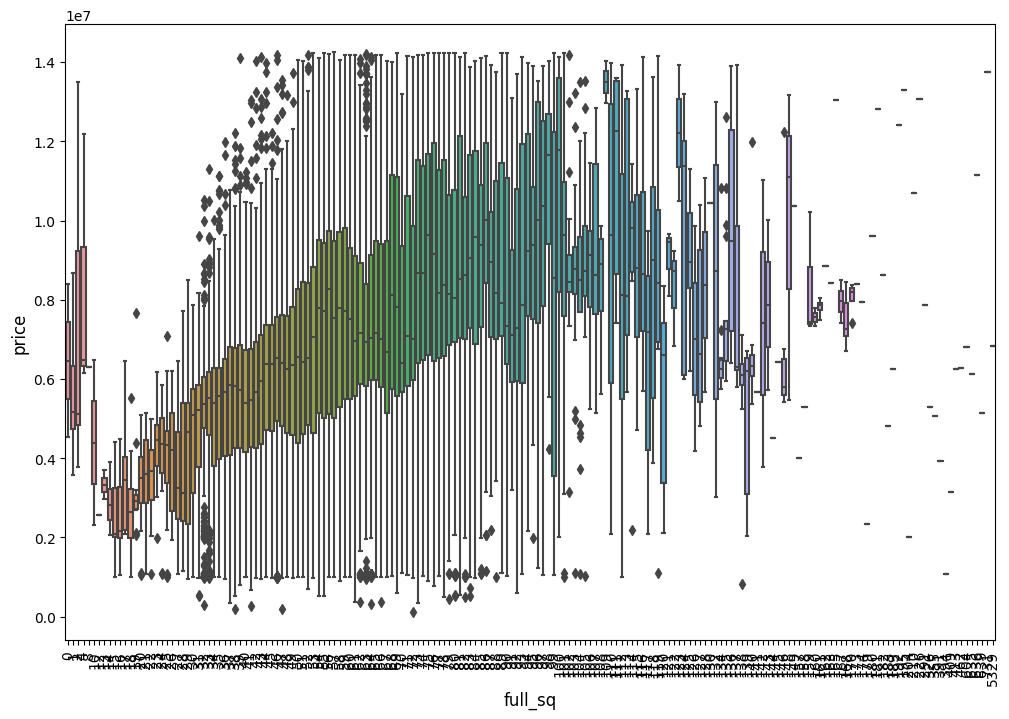

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='full_sq', y='price', data=trainMain)
plt.ylabel('price', fontsize=12)
plt.xlabel('full_sq', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

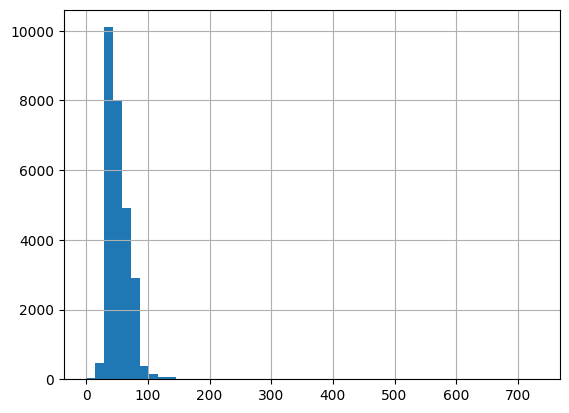

In [17]:
trainMain[trainMain.full_sq < 1000].full_sq.hist(bins=50)

In [18]:
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, 200, 5326]
trainMain['full_sq_bins'] = np.searchsorted(bins, trainMain.full_sq.values)

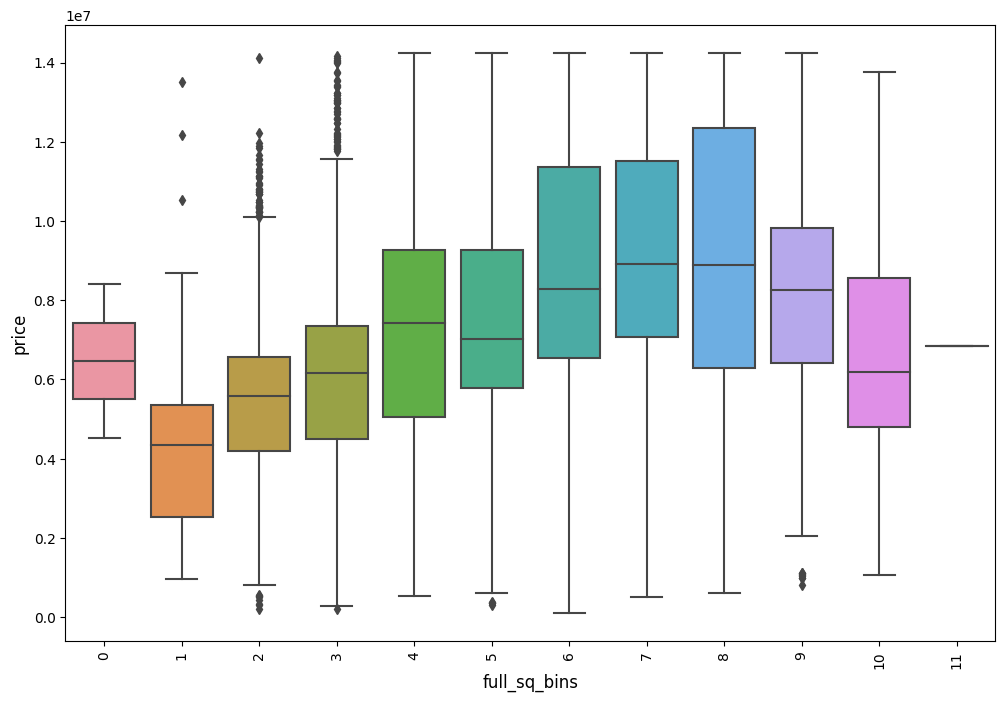

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='full_sq_bins', y='price', data=trainMain)
plt.ylabel('price', fontsize=12)
plt.xlabel('full_sq_bins', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [20]:
trainMain['timestamp'] = pd.to_datetime(trainMain['timestamp'])

In [21]:
trainMain.nlargest(10, 'price').id

22185    93723
12889    19938
3122     30152
5929     77804
15878    22745
14169    21428
4229     36396
18629    63058
27787    81708
10322    49738
Name: id, dtype: int64

In [22]:
trainMain['year'] = trainMain.timestamp.dt.year
trainMain['month'] = trainMain.timestamp.dt.month

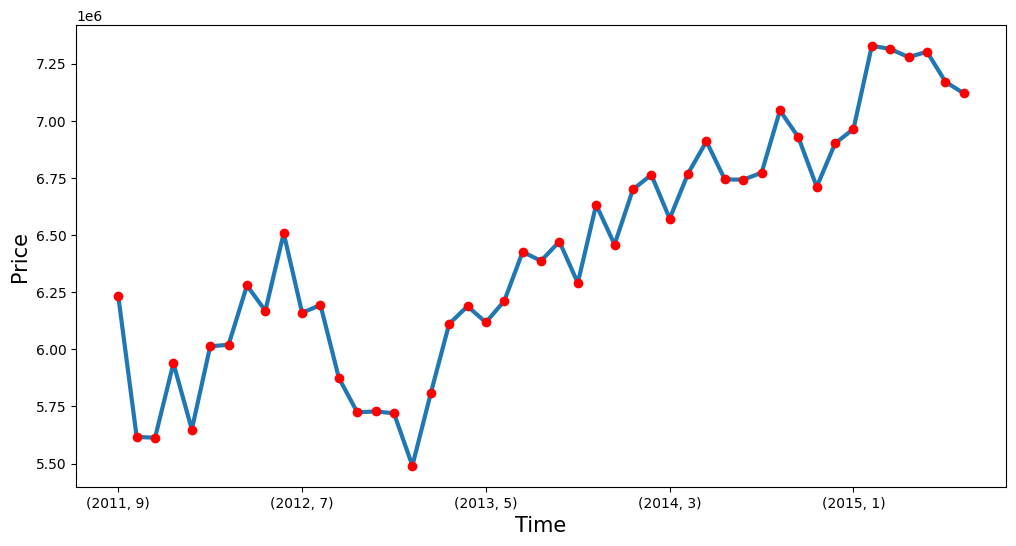

In [23]:
timePriceDF = trainMain.groupby(['year', 'month'])['price'].mean()
timePriceDF.plot(figsize=(12,6), marker='o', mec='r', mfc='r', linewidth=3)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [24]:
trainMain.groupby(['year', 'month'])['price']\
                .nlargest(3)\
                .reset_index()\
                .rename(columns={'level_2': 'index'})\
                .head(30)

,year,month,index,price
0,2011,9,2593,13283400.0
1,2011,9,14731,9982700.0
2,2011,9,6605,6962500.0
3,2011,10,78,13689600.0
4,2011,10,7910,12811000.0
5,2011,10,16035,12732300.0
6,2011,11,22816,14160000.0
7,2011,11,5078,12987400.0
8,2011,11,7013,12910700.0
9,2011,12,5682,14029600.0


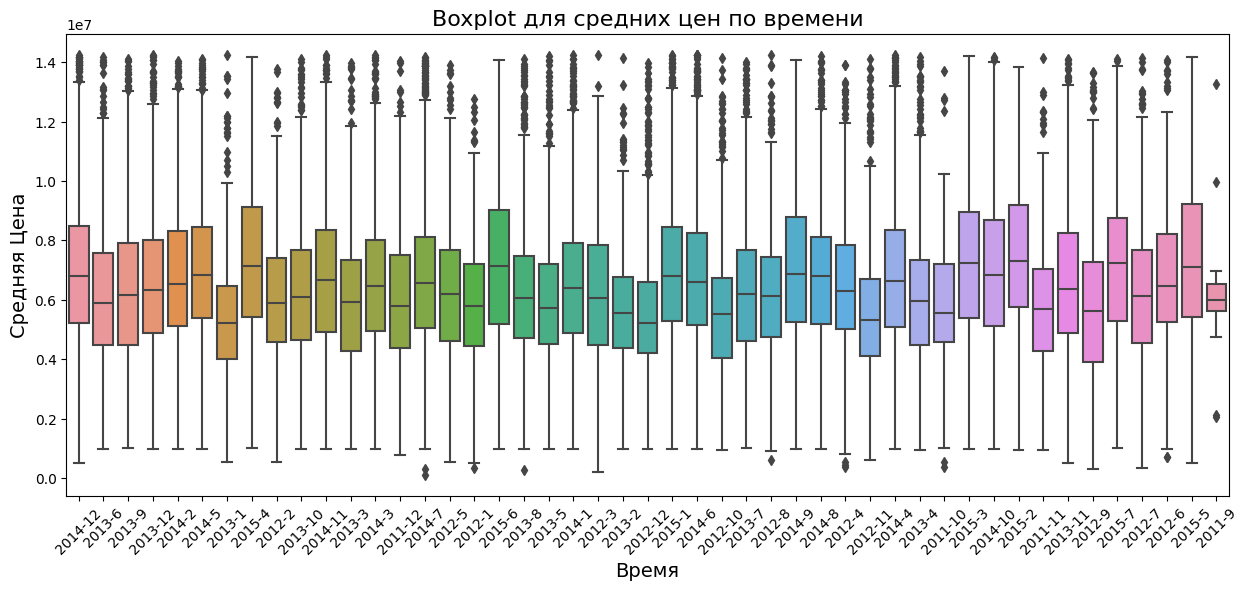

In [25]:
trainMain['year-month'] = trainMain['year'].astype(str) + '-' + trainMain['month'].astype(str)

plt.figure(figsize=(15, 6)) 

sns.boxplot(x='year-month', y='price', data=trainMain)

plt.xticks(rotation=45)

plt.title('Boxplot для средних цен по времени', fontsize=16)
plt.xlabel('Время', fontsize=14)
plt.ylabel('Средняя Цена', fontsize=14)

plt.show()

In [26]:
trainMain.nlargest(5, 'full_sq').id

19303    95156
18260    95936
6172     32115
9283     49518
13473    41202
Name: id, dtype: int64

In [27]:
trainMain.life_sq.isnull().sum()

5848

In [28]:
fullArea = trainMain.full_sq
lifeArea = trainMain.life_sq

fullAreaMean = np.mean(fullArea)
lifeAreaMean = np.mean(lifeArea)

numerator = np.sum((fullArea - fullAreaMean) * (lifeArea - lifeAreaMean))
denominator = np.sum((fullArea - fullAreaMean) ** 2)
w = numerator / denominator

b = lifeAreaMean - w * fullAreaMean

predictedLifeArea = w * trainMain[trainMain['life_sq'].isnull()]['full_sq'] + b

trainMain.loc[trainMain['life_sq'].isnull(), 'life_sq'] = predictedLifeArea

In [29]:
buildYear = trainMain.build_year
year = trainMain.year

buildYearMean = np.mean(buildYear)
yearMean = np.mean(year)

numerator = np.sum((buildYear - buildYearMean) * (year - yearMean))
denominator = np.sum((buildYear - buildYearMean) ** 2)
w = numerator / denominator

b = yearMean - w * buildYearMean

predictedBuildYear = w * trainMain[trainMain['build_year'].isnull()]['year'] + b

trainMain.loc[trainMain['build_year'].isnull(), 'build_year'] = predictedBuildYear

In [30]:
priceFullAreaCorr = trainMain['price'].corr(trainMain['full_sq'])
priceLifeAreaCorr = trainMain['price'].corr(trainMain['life_sq'])

In [31]:
fullTrain = trainMain.merge(trainAdd, how='left', on='id')
fullTest = testMain.merge(testAdd, how='left', on='id')


In [32]:
fullTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27169 entries, 0 to 27168
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               27169 non-null  int64         
 1   timestamp                        27169 non-null  datetime64[ns]
 2   full_sq                          27169 non-null  int64         
 3   life_sq                          27169 non-null  float64       
 4   floor                            27018 non-null  float64       
 5   max_floor                        18455 non-null  float64       
 6   material                         18455 non-null  float64       
 7   build_year                       27169 non-null  float64       
 8   num_room                         18455 non-null  float64       
 9   kitch_sq                         18455 non-null  float64       
 10  apartment condition              14817 non-null  float64  

In [33]:
fullTrain.fillna(0, inplace=True)

In [34]:
fullTrain.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'apartment condition',
       'sub_area', 'price', 'full_sq_bins', 'year', 'month', 'year-month',
       'population', 'indust_part', 'preschool_facilities',
       'school_facilities', 'hospital_beds_raion', 'healthcare_facilities',
       'university_num', 'sport_objects_facilities',
       'additional_education_facilities', 'culture_objects_facilities',
       'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
       'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities'],
      dtype='object')

In [35]:
y = np.asarray(fullTrain['price'].values.tolist())
X = fullTrain.drop(columns=['id','price','timestamp', 'year-month', 'full_sq_bins'], axis=1)
X = np.asarray(X.values.tolist())

In [36]:
print("The shape of the independent fatures are ",X.shape)
print("The shape of the dependent fatures are ",y.shape)

The shape of the independent fatures are  (27169, 30)
The shape of the dependent fatures are  (27169,)


In [37]:
y = y.reshape(len(y),1)

In [38]:
for i in range(X.shape[1]-2):
  X[:,i] = (X[:,i] - int(np.mean(X[:,i])))/np.std(X[:,i])

In [39]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

w = np.zeros([1,X.shape[1]])

alpha = 0.01
iters = 1000

In [40]:
def computeCost(X,y,w):
    errors = np.power(((X @ w.T)-y),2)
    return np.sum(errors)/(2 * len(X))

In [41]:
def gradientDescent(X,y,w,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        w = w - (alpha/len(X)) * np.sum(X * (X @ w.T - y), axis=0)
        cost[i] = computeCost(X, y, w)
    
    return w,cost

w,cost = gradientDescent(X,y,w,iters,alpha)

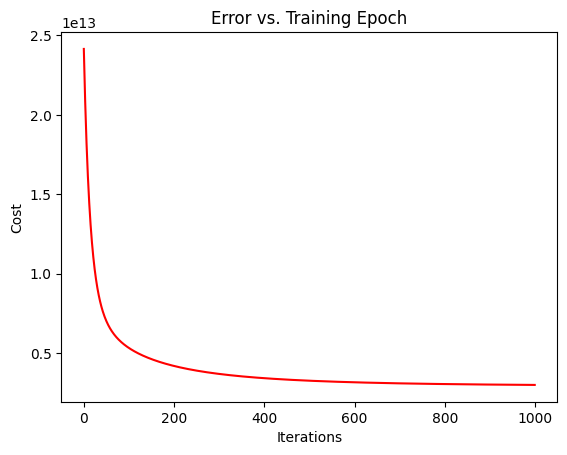

In [42]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [44]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101)

In [45]:
model = LinearRegression() 

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
predictions = model.predict(X_test) 

In [48]:
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

mean_squared_error :  13810806049312.918
mean_absolute_error :  1674769.4109041714


In [49]:
print(model.score(X_test, y_test))

-0.7618703159779192
